In [28]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [29]:
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
columns = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Species']
iris_data = pd.read_csv(url, header=None, names=columns)

In [30]:
# Exploring the data
print(iris_data.head())
print(iris_data.describe())
print(iris_data['Species'].value_counts())

   Sepal Length  Sepal Width  Petal Length  Petal Width      Species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
       Sepal Length  Sepal Width  Petal Length  Petal Width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
Species
Iris-setosa        50
Iris-versicolor 

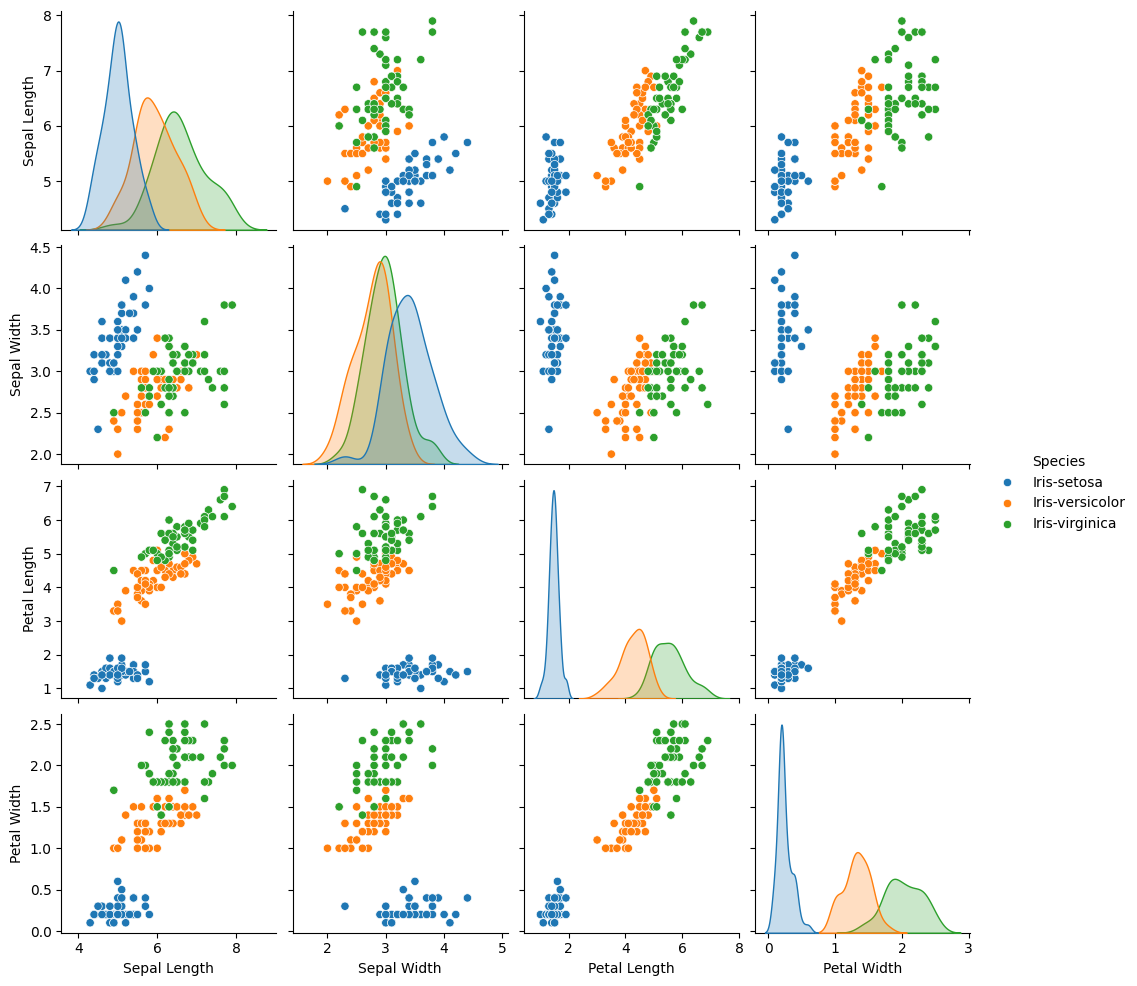

In [31]:
# Visualizing the data
sns.pairplot(iris_data, hue='Species')
plt.show()

In [32]:
# Preparing the data
X = iris_data.drop('Species', axis=1)
y = iris_data['Species']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
# Training the model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [35]:
# Making predictions
y_pred = knn.predict(X_test)

In [36]:
# Evaluating the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

Accuracy: 1.0


In [37]:
# Example prediction
example = [[5.1, 3.5, 1.4, 0.2]]
example_scaled = scaler.transform(example)
print(f'Prediction for {example}: {knn.predict(example_scaled)}')

Prediction for [[5.1, 3.5, 1.4, 0.2]]: ['Iris-setosa']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
